## NYC Taxi (2017)
---
The objective of this project was performing three studies over the NYC taxi 2017 dataset using PySpark and SQL syntax.

### Data Preparation
Firstly the dataset was imported in the form of a dataframe using the “read.csv” function. Since some entries were not containing valid logs, the whole data set was cleared up. The criteria used to do so was that the trips should have finished after the pickup time, their distance should be higher than 0 and the PULocationID and DOlocationID should be different.

In [ ]:
import pyspark
import pandas
import csv
import matplotlib as plt
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Import the data
df = spark.read.csv("tripdata_2017-01.csv",header=True)

#Clean up the data
df.registerTempTable("df")
clean = spark.sql("select * from df where tpep_dropoff_datetime>tpep_pickup_datetime and trip_distance>0 and PULocationID != DOLocationID")
clean.registerTempTable("clean")

# Locations
with open('taxi+_zone_lookup.csv', 'r') as f:
    locations_pre = list(csv.reader(f, delimiter=';'))
    locations = [locations_pre[n][0].replace('"', '').split(',') for n in range(len(locations_pre))]

# Rate code ID
ratecodes = ["Standard rate","JFK", "Newark", "Nassau or Westchester","Negotiated fare","Group ride"]

In [13]:
# Preview of the results
df.limit(10).toPandas()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0,0.5,2,0,0.3,15.3
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,.90,1,N,186,234,1,5,0,0.5,1.45,0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0,0.5,1,0,0.3,7.3
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6,0,0.5,1.7,0,0.3,8.5
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,.02,2,N,249,234,2,52,0,0.5,0,0,0.3,52.8
5,1,2017-01-01 00:00:02,2017-01-01 00:03:50,1,.50,1,N,48,48,2,4,0.5,0.5,0,0,0.3,5.3
6,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,22,0.5,0.5,4.66,0,0.3,27.96
7,1,2017-01-01 00:00:03,2017-01-01 00:06:58,1,.80,1,N,162,161,1,6,0.5,0.5,1.45,0,0.3,8.75
8,1,2017-01-01 00:00:05,2017-01-01 00:08:33,2,.90,1,N,48,50,1,7,0.5,0.5,0,0,0.3,8.3
9,2,2017-01-01 00:00:05,2017-01-01 00:05:04,5,1.76,1,N,140,74,2,7,0.5,0.5,0,0,0.3,8.3


## Zone with the most Pick-ups

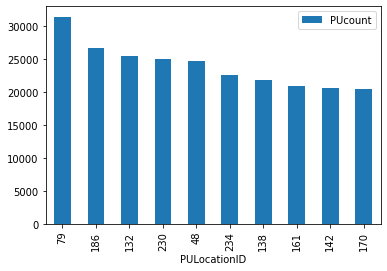

In [4]:
most_PUlocation=spark.sql("select PULocationID, count(*) as PUcount from clean group by PUlocationID order by PUcount desc")

# Plot with the top ten LocationIDs
most_PUlocation.limit(10).toPandas().plot(kind='bar',x='PULocationID',y='PUcount')


## Rate that reported the highest gains

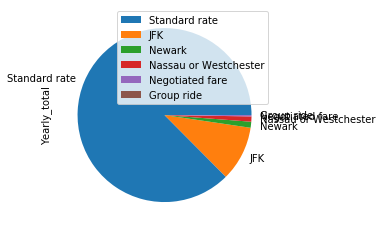

In [5]:
richer=spark.sql("select RatecodeID, SUM(total_amount) as Yearly_total from clean group by RatecodeID order by Yearly_total desc")

richer.toPandas().plot(kind='pie',x='RatecodeID',y='Yearly_total', labels=ratecodes)


## Average tip per passenger given the rate

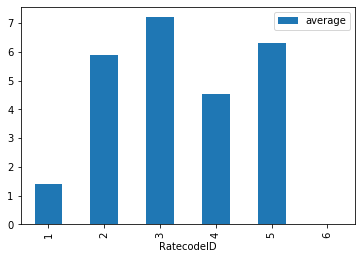

In [6]:
avg_tip = spark.sql("select RatecodeID, avg(tip_amount/passenger_count) as average from clean group by RatecodeID order by RatecodeID")
avg_tip.toPandas().plot(kind='bar',x='RatecodeID',y='average')

## Most common trips

In [14]:
trip = spark.sql("select PULocationID, DOLocationID, count(*) as numTrips from clean group by PULocationID,DOLocationID order by numTrips desc")
trip.limit(10).toPandas()


,PULocationID,DOLocationID,numTrips
0,230,246,2515
1,237,236,1841
2,142,238,1774
3,79,170,1772
4,236,237,1592
5,238,142,1471
6,249,79,1439
7,186,230,1429
8,79,186,1409
9,239,236,1366
